

>  ## ***`Task 3: K-Means Clustering`*** ##

---
```Description:```

` Implement K-Means clustering to group unlabeled data into clusters (e.g., customer segmentation)`

---
```Objectives:```

```
1.  Load a dataset and preprocess it (scaling).
2.  Apply K-Means clustering and determine the optimal
    number of clusters using the elbow method.
3.  Visualize clusters using 2D scatter plots.
4.  Interpret the clustering results.
```

---

`Tools: Python, scikit-learn, pandas.`

`Using churn-bigml-20 dataset.`

### ***1- Import pre-processing libs*** ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### ***2- Import and Load Data*** ###

In [3]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\Churn-Prdiction-Data\churn-bigml-20.csv')

In [4]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### ***3- Exploring Data*** ###

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [8]:
df.shape

(667, 20)

In [9]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [10]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


### ***4- Data Preprocessing*** ###

In [11]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
df.drop(columns=['Area code', 'State'], inplace=True)

In [13]:
df.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [14]:
df['International plan'].value_counts()

International plan
No     614
Yes     53
Name: count, dtype: int64

In [15]:
df['Voice mail plan'].value_counts()

Voice mail plan
No     478
Yes    189
Name: count, dtype: int64

In [16]:
df['Churn'].value_counts()

Churn
False    572
True      95
Name: count, dtype: int64

### ***5_ Data Encoding*** ###

In [17]:
le = LabelEncoder() # Label Encoder to convert categorical variables to numerical 
df["International plan"] = le.fit_transform(df["International plan"])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])

In [18]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [19]:
df['Churn'].value_counts()

Churn
0    572
1     95
Name: count, dtype: int64

### ***6_ Feature & Target Selection*** ###

In [20]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [21]:
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [22]:
y

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

### ***7_ Spliting the dataset into the Training set and Test set*** ###

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((533, 17), (134, 17), (533,), (134,))

### ***8_ Scaling Data*** ###

In [25]:
scaler = StandardScaler() # Scale numerical features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[-1.17990376, -0.30733671, -0.62291318, ...,  0.58957864,
         2.48307103, -1.16489562],
       [-0.08057611, -0.30733671, -0.62291318, ..., -1.41966314,
        -0.26164825,  3.28592421],
       [-0.91117922, -0.30733671, -0.62291318, ...,  0.18773028,
        -0.38214812, -0.42309232],
       ...,
       [-0.32487114, -0.30733671, -0.62291318, ..., -0.61596643,
         0.20696236, -1.16489562],
       [ 0.0171419 , -0.30733671, -0.62291318, ...,  0.18773028,
         0.78268396, -1.16489562],
       [-0.39815965, -0.30733671, -0.62291318, ...,  0.58957864,
         0.99690595, -0.42309232]])

In [32]:
X_test

array([[ 0.26143694, -0.30733671, -0.62291318, ..., -0.21411807,
         0.52829535, -0.42309232],
       [ 1.16532856, -0.30733671,  1.60536015, ...,  0.18773028,
         1.14418357, -1.16489562],
       [ 0.94546303, -0.30733671,  1.60536015, ..., -0.61596643,
        -1.38631371, -0.42309232],
       ...,
       [-1.59520532, -0.30733671,  1.60536015, ...,  0.58957864,
         1.78684955,  0.31871099],
       [-2.2059429 , -0.30733671, -0.62291318, ..., -0.61596643,
         0.38101773, -0.42309232],
       [-0.20272363, -0.30733671, -0.62291318, ...,  1.7951237 ,
         0.82285059, -0.42309232]])

### ***9- Train KNN Model*** ###

In [44]:
# Determine optimal number of clusters using elbow method

# Range of cluster to try
cluster_range = range(2, 11)

# Initialize lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []

In [45]:

for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train)
  inertia_scores.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

### ***10_ Visualize K-Means clustering Without using PCA*** ###

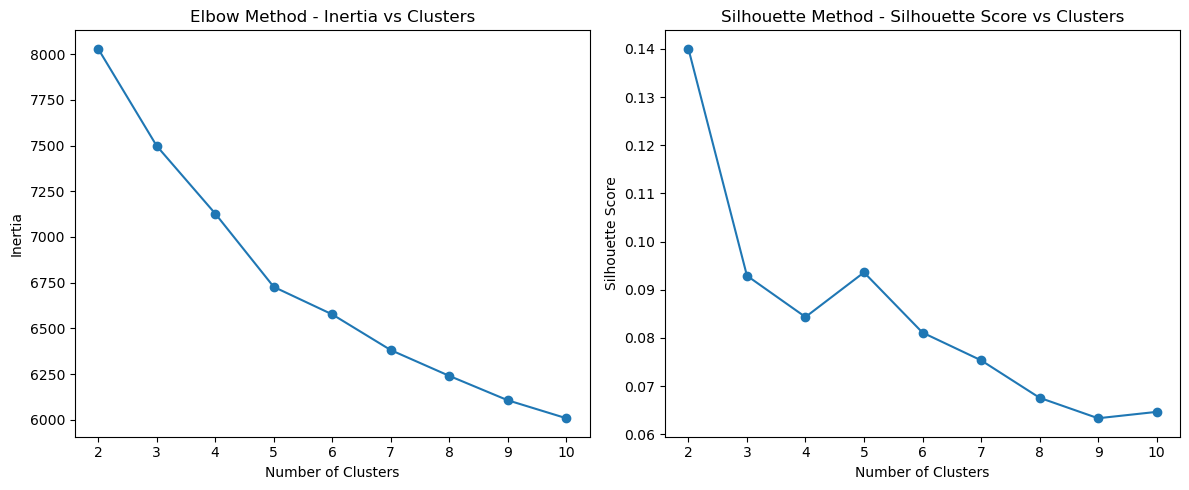

In [49]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(cluster_range, inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs Clusters')

plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Silhouette Score vs Clusters')

plt.tight_layout()
plt.show()
     

### ***11_ Visualize K-Means clustering using PCAl*** ###

In [55]:
# Apply KMeans with k=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(X_train)

In [56]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

In [57]:
# Create DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

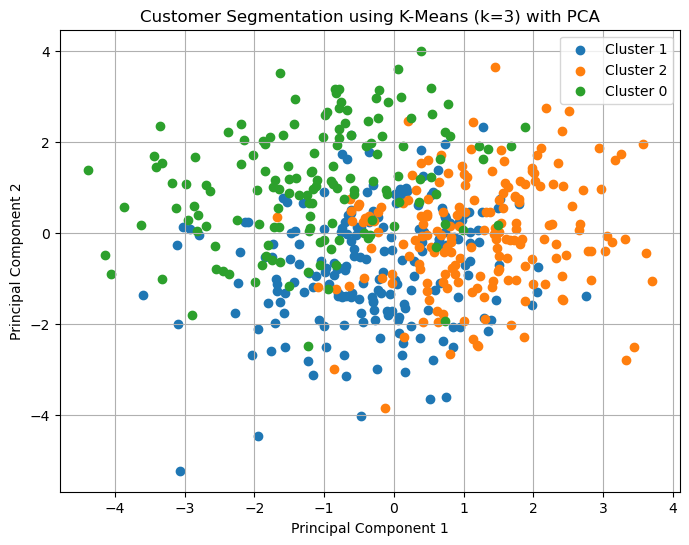

In [58]:
# Plotting
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segmentation using K-Means (k=3) with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## ***`Conclusion`*** ##

**In this notebook, we successfully implemented K-Means clustering for customer segmentation using the churn-bigml-20 dataset. The main steps included:**

---

```
1. Loaded and explored the churn dataset, checking for missing and duplicate values.
2. Preprocessed the data by encoding categorical variables and dropping irrelevant features.
3. Scaled the numerical features to ensure consistent model performance.
4. Applied the elbow method to determine the optimal number of clusters for K-Means.
5. Performed K-Means clustering to group customers into clusters (k=3).
6. Used PCA to reduce dimensionality for visualization of clusters.
7. Visualized the clusters using a 2D scatter plot based on principal components.
8. Evaluated the clustering quality using silhouette score and interpreted the results.
```

---

**These steps enabled effective customer segmentation, providing insights into distinct customer groups based on their usage patterns and characteristics.**